In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

In [20]:
N = 250              # number of particles
zeta =10
M = 3                # number of particles inserted/deleted at each step

In [21]:
def g_dist(x,peak_value, peak_loc, std):
    return peak_value * norm.pdf(x,peak_loc, std)         # arbitrary distribution 

In [22]:
x = np.linspace(0, N, N)

In [23]:
g_dis = np.zeros((N,N))

In [24]:
for i in range(N):
    g_dis[i,:] = g_dist(x,1,i,1)

In [25]:
num = int(1e6)                    # number of timesteps

In [26]:
kb = 1                            # boltzman constant
T = 1                             # temperature
dh = 1                            
beta =1                            
mu = 1                            # chemical potential
v =1
lam = 1                           # lambda for poissons distribution
K= np.linspace(100,500,21)
l=np.linspace(0,20,21)

In [27]:
n= np.zeros(num+1)                # number of particles at each timestep
n

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
K

array([100., 120., 140., 160., 180., 200., 220., 240., 260., 280., 300.,
       320., 340., 360., 380., 400., 420., 440., 460., 480., 500.])

In [29]:
"""takes in number of steps and number of particles to be inserted at each step and inserts and deletes
 the particles based on acceptance and deletion probabilities"""





def metropolis_scheme(n,num,M):
    
    for i in range(num):
        
        a = np.random.uniform(0,1)            # generate a random number from (0,1)
        dh = M
       
        if a < 0.5 or n[i]==0:                # insertion case
        
        
            r = np.random.uniform(0,1)        # generate a random number in (0,1)
            
            nn = int(n[i])
        
            if r < np.minimum(1, (zeta**dh)/(math.factorial(nn+dh)/math.factorial(nn))):
            
                n[i+1:] += dh                 # insert the particle with probability r
                
                
                
        elif a >= 0.5 and n[i]>dh:            # deletion case
        
            
        
            r = np.random.uniform(0,1)        # generate a random number in (0,1)
            
            nn= int(n[i])
        
            if r < np.minimum(1, ((math.factorial(nn)/(math.factorial(nn-dh)))/(zeta**dh))):
            
                n[i+1:] -= dh                 # delete the particle with probability r
        
                
    
    

In [30]:
metropolis_scheme(n,num-1,M)

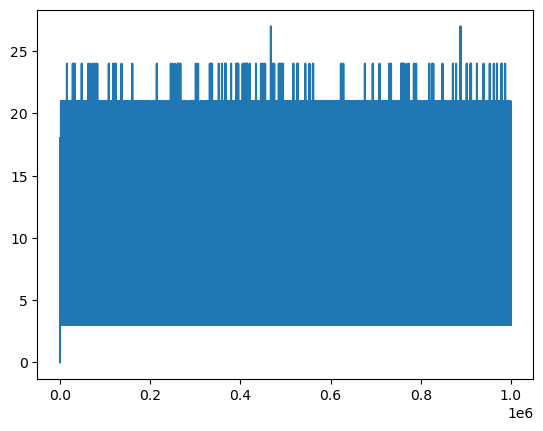

In [31]:
plt.plot(n)         # total number of particles at each step

In [50]:
n_mean = n.mean()
n_max = n.max()

print("the average number of particles =", int(n_mean), "and the maximum number of particles =", int(n_max))

the average number of particles = 10 and the maximum number of particles = 27


In [32]:
peq = np.zeros(100)

In [33]:
for i in range(100):
    peq[i] = (10**i)*np.exp(-10)/(math.factorial(i))

'the equilibrium probability distribution described by the grand canonical ensemble should approach the poissons distribution'

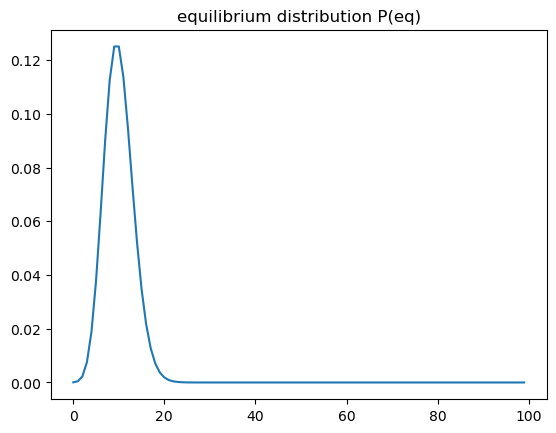

In [51]:
plt.plot(peq)

plt.title('equilibrium distribution P(eq)')

"""the equilibrium probability distribution described by the grand canonical ensemble should approach the poissons distribution"""       

Text(0.5, 1.0, 'equilibrium distribution described by metropolis hastings scheme')

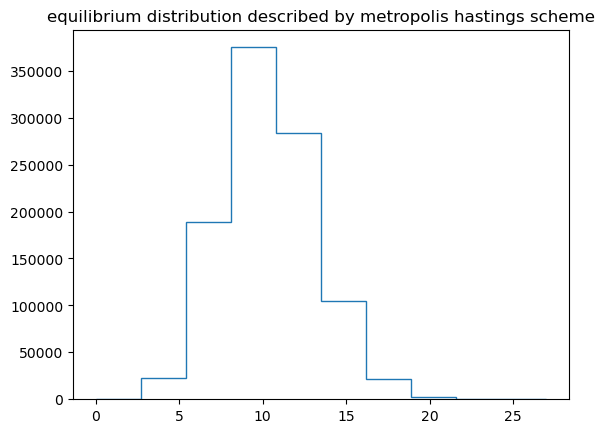

In [63]:
plt.hist(n,histtype='step') 

plt.title('equilibrium distribution described by metropolis hastings scheme')

The probability distribution described by the monte carlo simulation is in accordance with the poissons distribution.

In [52]:
np.var(n)

10.013145027817929

In [53]:
np.std(n)

3.164355388988084